In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow.keras.utils as image
import cv2
import colorsys
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from keras import backend as K

In [2]:
# function to create a list of numbers as x for graph plotting
def createList(r1, r2):
    # Testing if range r1 and r2
    # are equal
    if (r1 == r2):
        return r1
    else:
        # Create empty list
        res = []
        # loop to append successors to
        # list until r2 is reached.
        while(r1 < r2+1 ): 
            res.append(r1)
            r1 += 1
    return res

# function to determine R-squred for keras models
def r_square(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [3]:
# Obtain current path location
import os
current_path = os.getcwd()
print(current_path)

C:\Users\User\Documents\Year 4\spring sem\MEP 2\ml_mep2\models


100%|████████████████████████████████████████████████████████████████████████████████| 260/260 [00:19<00:00, 13.60it/s]


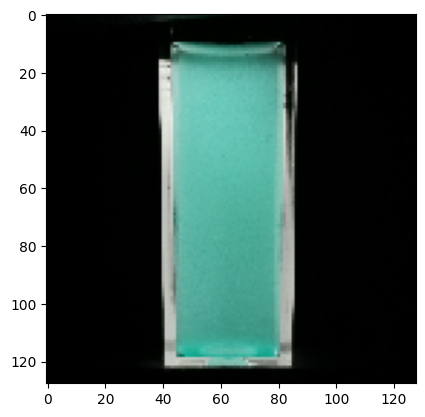

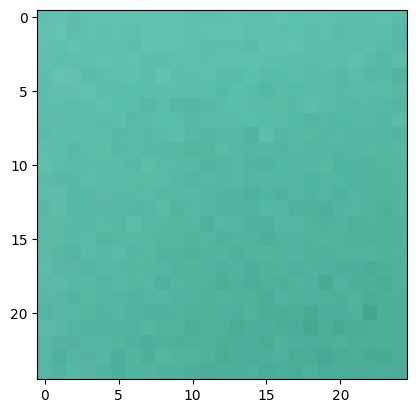

[ 85.7936 183.0688 164.16  ]
(0.467602568109172, 0.5313587023020854, 183.0688)


In [4]:
# Load the data
csv_file = r'C:\\Users\\User\\Documents\\Year 4\\spring sem\\MEP 2\\ml_mep2\\image\\image_dataset\\image_feature.csv'
#import csv file into dataframe 'df'
df = pd.read_csv(csv_file)

#specify image size
image_width = 128
image_height = 128

# Assigning required dataframes
df_RGBimage = []
df_HSVimage = []
df_RGB = []
df_HSV = []

for i in tqdm(range(df.shape[0])):
    # Load images according to the csv file
    img = cv2.imread(r'C:\\Users\\User\\Documents\\Year 4\\spring sem\\MEP 2\\ml_mep2\\image\\image_dataset\\'
                     +df['img_id'][i]+'.jpg')
    img = cv2.resize(img, (image_width, image_height))
    
    # Crop 20% of the image from the image midpoint
    left = int(image_width*0.4)
    top = int(image_height*0.4)
    right = int(image_width*0.6)
    bottom = int(image_height*0.6)
    img_crop = img[left:right, top:bottom]
    
    # Image to array
    img_RGB = image.img_to_array(img_crop)
    
     # Convert image into HSV image
    img_HSV1 = cv2.cvtColor(img_crop, cv2.COLOR_RGB2HSV)
    img_HSV = image.img_to_array(img_HSV1)
    
    # Obtain average RGB value of the image
    average_RGB = img_crop.mean(axis=(0, 1))
    
    # Convert the average RGB value to HSV
    average_HSV = colorsys.rgb_to_hsv(*average_RGB)
    
    # Append Data into df
    df_RGBimage.append(img_RGB)
    df_RGB.append(average_RGB)
    df_HSV.append(average_HSV)

# Prepare X and Y for the models

num_channel = 3 #RGB and HSV both = 3
image_width = int(right-left)
image_height = int(bottom-top)
X_col = len(df.index)

X_RGBimage = np.array(df_RGBimage)
X_RGBimage = X_RGBimage.reshape(X_col, image_width, image_height, num_channel)
X_RGBimage /= 255

X_RGB = np.array(df_RGB)
X_RGB /= 255

X_HSV = np.array(df_HSV)
X_HSV /= 360

y1 = np.array(df['absorbance'])

# Plot and show example result
plt.figure()
plt.imshow(img) 
plt.show()
plt.figure()
plt.imshow(img_crop) 
plt.show()
print(average_RGB)
print(average_HSV)

In [5]:
# Split the data into training and validation sets
X_RGBimage_train, X_RGBimage_test, y1_RGBimage_train, y1_RGBimage_test = train_test_split(
    X_RGBimage, 
    y1, 
    test_size=0.3, 
    random_state=3
)

X_RGB_train, X_RGB_test, y1_RGB_train, y1_RGB_test = train_test_split(
    X_RGB, 
    y1, 
    test_size=0.3, 
    random_state=3
)

X_HSV_train, X_HSV_test, y1_HSV_train, y1_HSV_test = train_test_split(
    X_HSV, 
    y1, 
    test_size=0.3, 
    random_state=3
)

LR_RGB - R^2: 0.9327171429166371
LR_RGB - MSE: 0.48554909143764874
LR_RGB - MAE: 0.5117688755523635


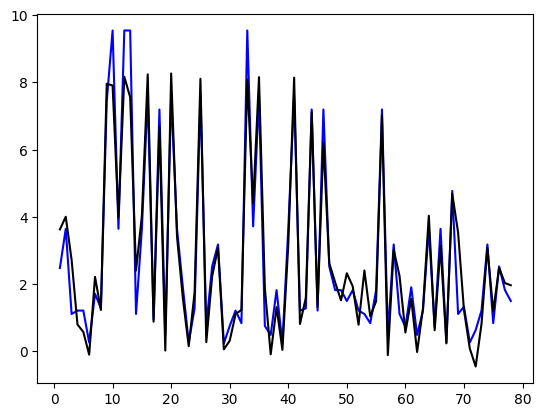

In [6]:
# Linear Regression Model - RGB
model = LinearRegression()
model.fit(X_RGB_train, y1_RGB_train)

# Evaluate the model on the validation set
score_LR_RGB = model.score(X_RGB_test, y1_RGB_test)
print('LR_RGB - R^2:', score_LR_RGB)

y_pred_lr_rgb = model.predict(X_RGB_test)

# Calculate the MSE and MAE
mse_LR_RGB = mean_squared_error(y1_RGB_test, y_pred_lr_rgb)
mae_LR_RGB = mean_absolute_error(y1_RGB_test, y_pred_lr_rgb)

# Print the results
print("LR_RGB - MSE:", mse_LR_RGB)
print("LR_RGB - MAE:", mae_LR_RGB)

#plot
x_plt = createList(1, len(y1_RGB_test))

plt.plot(x_plt, y1_RGB_test, color ='b')
plt.plot(x_plt, y_pred_lr_rgb, color ='k')
plt.show()

LR_HSV - R^2: 0.9438501369338818
LR_HSV - MSE: 0.405207450722891
LR_HSV - MAE: 0.47050569881100823


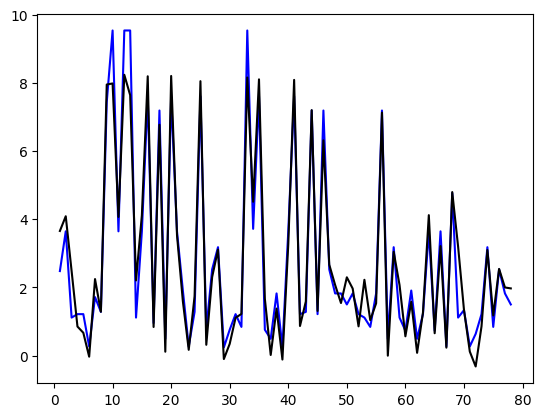

In [7]:
# Linear Regression Model - HSV
model = LinearRegression()
model.fit(X_HSV_train, y1_HSV_train)

# Evaluate the model on the validation set
score_LR_HSV = model.score(X_HSV_test, y1_HSV_test)
print('LR_HSV - R^2:', score_LR_HSV)

y_pred_lr_hsv = model.predict(X_HSV_test)

# Calculate the MSE and MAE
mse_LR_HSV = mean_squared_error(y1_HSV_test, y_pred_lr_hsv)
mae_LR_HSV = mean_absolute_error(y1_HSV_test, y_pred_lr_hsv)

# Print the results
print("LR_HSV - MSE:", mse_LR_HSV)
print("LR_HSV - MAE:", mae_LR_HSV)

#plot
x_plt = createList(1, len(y1_HSV_test))

plt.plot(x_plt, y1_HSV_test, color ='b')
plt.plot(x_plt, y_pred_lr_hsv, color ='k')
plt.show()

SVR_RGB - R^2: 0.9011860213322594
SVR_RGB - MSE: 0.7130945331886697
SVR_RGB - MAE: 0.5173004374358552


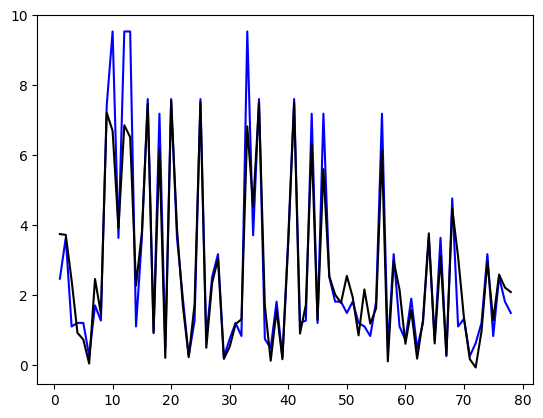

In [8]:
# Support Vector Regression - RGB
model = SVR(kernel='linear')

# Train the model
model.fit(X_RGB_train, y1_RGB_train)

# Evaluate the model on the validation set
score_SVR_RGB = model.score(X_RGB_test, y1_RGB_test)
print('SVR_RGB - R^2:', score_SVR_RGB)

# Make predictions on the test set
y_pred_svr_rgb = model.predict(X_RGB_test)

# Evaluate the model
mse_SVR_RGB = mean_squared_error(y1_RGB_test, y_pred_svr_rgb)
mae_SVR_RGB = mean_absolute_error(y1_RGB_test, y_pred_svr_rgb)

# Print the results
print("SVR_RGB - MSE:", mse_SVR_RGB)
print("SVR_RGB - MAE:", mae_SVR_RGB)

#plot
x_plt = createList(1, len(y1_RGB_test))

plt.plot(x_plt, y1_RGB_test, color ='b')
plt.plot(x_plt, y_pred_svr_rgb, color ='k')
plt.show()

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'C': 35, 'epsilon': 0.15, 'kernel': 'rbf'}
SVR_RGB - R^2            : 0.9011860213322594
SVR_RGB - R^2 (optimized): 0.983274689814143
SVR_RGB - MSE            : 0.7130945331886697
SVR_RGB - MSE (optimized): 0.12069878594325911
SVR_RGB - MAE            : 0.5173004374358552
SVR_RGB - MAE (optimized): 0.23578373866898822


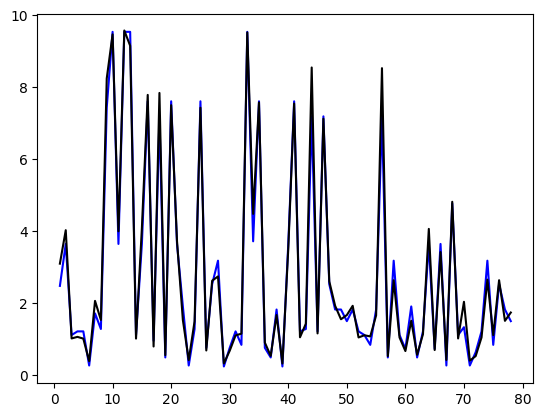

In [9]:
# Support Vector Regression - RGB (optimized via grid search method)

# Set the parameters for the grid search
parameters = {
    'kernel': ['rbf'], 
    'C': [35], 
    'epsilon': [0.15]
}

# Create the grid search object
grid_search = GridSearchCV(SVR(), parameters, cv=5, verbose=1)

# Fit the grid search object to the training data
grid_search.fit(X_RGB_train, y1_RGB_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(best_params)

# Create an SVM model with the best parameters
model = SVR(**best_params)

# Train the model
model.fit(X_RGB_train, y1_RGB_train)

# Evaluate the model on the validation set
print('SVR_RGB - R^2            :', score_SVR_RGB)
score_SVR_RGB = model.score(X_RGB_test, y1_RGB_test)
print('SVR_RGB - R^2 (optimized):', score_SVR_RGB)

# Make predictions on the test set
y_pred_svr_rgb = model.predict(X_RGB_test)

# Evaluate the model
print("SVR_RGB - MSE            :", mse_SVR_RGB)
mse_SVR_RGB = mean_squared_error(y1_RGB_test, y_pred_svr_rgb)
print("SVR_RGB - MSE (optimized):", mse_SVR_RGB)

print("SVR_RGB - MAE            :", mae_SVR_RGB)
mae_SVR_RGB = mean_absolute_error(y1_RGB_test, y_pred_svr_rgb)
print("SVR_RGB - MAE (optimized):", mae_SVR_RGB)

#plot
x_plt = createList(1, len(y1_RGB_test))

plt.plot(x_plt, y1_RGB_test, color ='b')
plt.plot(x_plt, y_pred_svr_rgb, color ='k')
plt.show()

SVR_HSV - R^2: 0.21061328369764276
SVR_HSV - MSE: 5.696636847907194
SVR_HSV - MAE: 1.5650172377614684


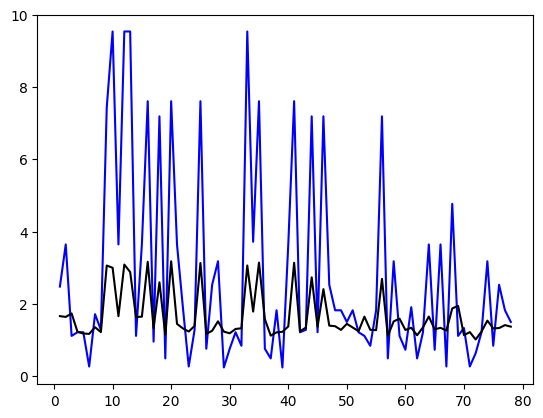

In [10]:
# Support Vector Regression - HSV
model = SVR(kernel='linear')

# Train the model
model.fit(X_HSV_train, y1_HSV_train)

# Evaluate the model on the validation set
score_SVR_HSV = model.score(X_HSV_test, y1_HSV_test)
print('SVR_HSV - R^2:', score_SVR_HSV)

# Make predictions on the test set
y_pred_svr_hsv = model.predict(X_HSV_test)

# Evaluate the model
mse_SVR_HSV = mean_squared_error(y1_HSV_test, y_pred_svr_hsv)
mae_SVR_HSV = mean_absolute_error(y1_HSV_test, y_pred_svr_hsv)

# Print the results
print("SVR_HSV - MSE:", mse_SVR_HSV)
print("SVR_HSV - MAE:", mae_SVR_HSV)

#plot
x_plt = createList(1, len(y1_HSV_test))

plt.plot(x_plt, y1_HSV_test, color ='b')
plt.plot(x_plt, y_pred_svr_hsv, color ='k')
plt.show()

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'C': 1000, 'epsilon': 0.0016, 'kernel': 'rbf'}
SVR_HSV - R^2            : 0.21061328369764276
SVR_HSV - R^2 (optimized): 0.9359845819321541
SVR_HSV - MSE            : 5.696636847907194
SVR_HSV - MSE (optimized): 0.461969503499721
SVR_HSV - MAE            : 1.5650172377614684
SVR_HSV - MAE (optimized): 0.461028873971321


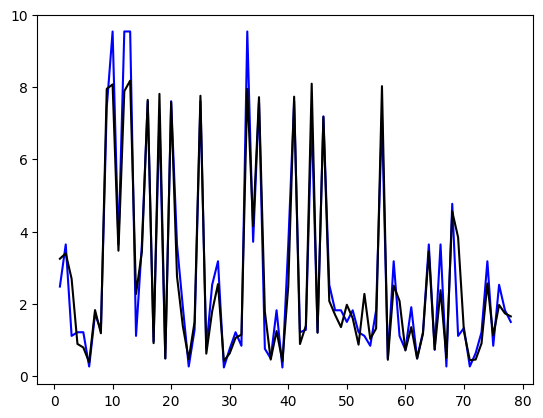

In [11]:
# Support Vector Regression - HSV (optimized via grid search method)

# Set the parameters for the grid search
parameters = {
    'kernel': ['rbf'], 
    'C': [1000], 
    'epsilon': [0.0016]
}

# Create the grid search object
grid_search = GridSearchCV(SVR(), parameters, cv=5, verbose=1)

# Fit the grid search object to the training data
grid_search.fit(X_HSV_train, y1_HSV_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(best_params)

# Create an SVM model with the best parameters
model = SVR(**best_params)

# Train the model
model.fit(X_HSV_train, y1_HSV_train)

# Evaluate the model on the validation set
print('SVR_HSV - R^2            :', score_SVR_HSV)
score_SVR_HSV = model.score(X_HSV_test, y1_HSV_test)
print('SVR_HSV - R^2 (optimized):', score_SVR_HSV)

# Make predictions on the test set
y_pred_svr_hsv = model.predict(X_HSV_test)

# Evaluate the model
print("SVR_HSV - MSE            :", mse_SVR_HSV)
mse_SVR_HSV = mean_squared_error(y1_HSV_test, y_pred_svr_hsv)
print("SVR_HSV - MSE (optimized):", mse_SVR_HSV)

print("SVR_HSV - MAE            :", mae_SVR_HSV)
mae_SVR_HSV = mean_absolute_error(y1_HSV_test, y_pred_svr_hsv)
print("SVR_HSV - MAE (optimized):", mae_SVR_HSV)

#plot
x_plt = createList(1, len(y1_HSV_test))

plt.plot(x_plt, y1_HSV_test, color ='b')
plt.plot(x_plt, y_pred_svr_hsv, color ='k')
plt.show()

GBR_RGB - R^2: 0.9796357930744317
GBR_RGB - MSE: 0.14695901153999777
GBR_RGB - MAE: 0.18793209359375743


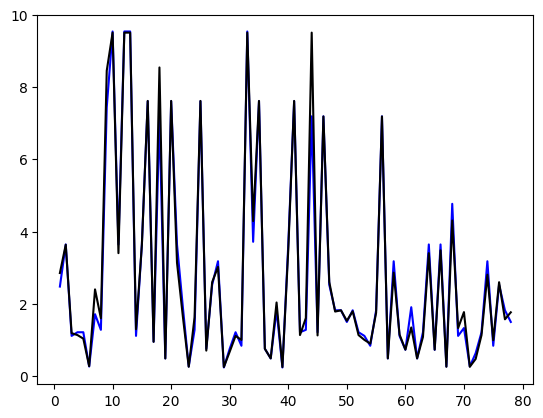

In [12]:
# Gradient Boosting Regressor - RGB

# Create the model
model = GradientBoostingRegressor()

# Fit the model to the training data
model.fit(X_RGB_train, y1_RGB_train)

# Evaluate the model on the validation set
score_GBR_RGB = model.score(X_RGB_test, y1_RGB_test)
print('GBR_RGB - R^2:', score_GBR_RGB)

# Make predictions on the test set
y_pred_gbr_rgb = model.predict(X_RGB_test)

# Evaluate the model
mse_GBR_RGB = mean_squared_error(y1_RGB_test, y_pred_gbr_rgb)
mae_GBR_RGB = mean_absolute_error(y1_RGB_test, y_pred_gbr_rgb)

# Print the results
print("GBR_RGB - MSE:", mse_GBR_RGB)
print("GBR_RGB - MAE:", mae_GBR_RGB)

#plot
x_plt = createList(1, len(y1_RGB_test))

plt.plot(x_plt, y1_RGB_test, color ='b')
plt.plot(x_plt, y_pred_gbr_rgb, color ='k')
plt.show()

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'learning_rate': 0.19, 'loss': 'huber', 'max_depth': 2, 'n_estimators': 267}
GBR_RGB - R^2            : 0.9796357930744317
GBR_RGB - R^2 (optimized): 0.976941030422211
GBR_RGB - MSE            : 0.14695901153999777
GBR_RGB - MSE (optimized): 0.16640586047218148
GBR_RGB - MAE            : 0.18793209359375743
GBR_RGB - MAE (optimized): 0.2015586074114204


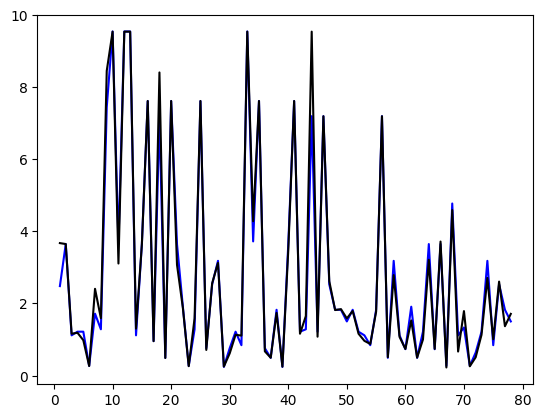

In [13]:
# Gradient Boosting Regressor - RGB (optimized)

# Set the parameters for the grid search
parameters = {
    'n_estimators': [267],
    'max_depth': [2],
    'learning_rate': [0.19],
    'loss': ['huber']
}

# Create the grid search object
grid_search = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5, verbose=1)

# Fit the grid search object to the training data
grid_search.fit(X_RGB_train, y1_RGB_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(best_params)

# Create model with the best parameters
model = GradientBoostingRegressor(**best_params)

# Train the model
model.fit(X_RGB_train, y1_RGB_train)

# Evaluate the model on the validation set
print('GBR_RGB - R^2            :', score_GBR_RGB)
score_GBR_RGB = model.score(X_RGB_test, y1_RGB_test)
print('GBR_RGB - R^2 (optimized):', score_GBR_RGB)

# Make predictions on the test set
y_pred_gbr_rgb = model.predict(X_RGB_test)

# Evaluate the model
print("GBR_RGB - MSE            :", mse_GBR_RGB)
mse_GBR_RGB = mean_squared_error(y1_RGB_test, y_pred_gbr_rgb)
print("GBR_RGB - MSE (optimized):", mse_GBR_RGB)

print("GBR_RGB - MAE            :", mae_GBR_RGB)
mae_GBR_RGB = mean_absolute_error(y1_RGB_test, y_pred_gbr_rgb)
print("GBR_RGB - MAE (optimized):", mae_GBR_RGB)

#plot
x_plt = createList(1, len(y1_RGB_test))

plt.plot(x_plt, y1_RGB_test, color ='b')
plt.plot(x_plt, y_pred_gbr_rgb, color ='k')
plt.show()

GBR_HSV - R^2: 0.9843037066219871
GBR_HSV - MSE: 0.11327285015840242
GBR_HSV - MAE: 0.18497086477981406


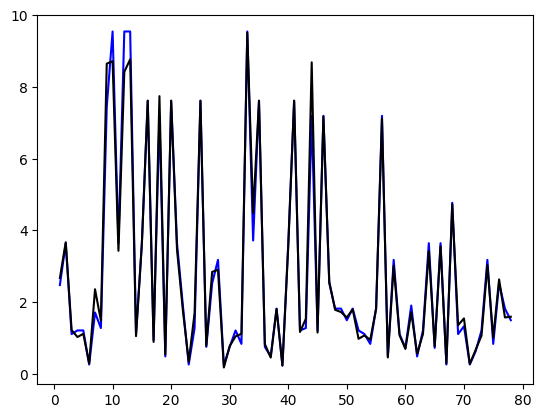

In [14]:
# Gradient Boosting Regressor - HSV

# Create the model
model = GradientBoostingRegressor()

# Fit the model to the training data
model.fit(X_HSV_train, y1_HSV_train)

# Evaluate the model on the validation set
score_GBR_HSV = model.score(X_HSV_test, y1_HSV_test)
print('GBR_HSV - R^2:', score_GBR_HSV)

# Make predictions on the test set
y_pred_gbr_hsv = model.predict(X_HSV_test)

# Evaluate the model
mse_GBR_HSV = mean_squared_error(y1_HSV_test, y_pred_gbr_hsv)
mae_GBR_HSV = mean_absolute_error(y1_HSV_test, y_pred_gbr_hsv)

# Print the results
print("GBR_HSV - MSE:", mse_GBR_HSV)
print("GBR_HSV - MAE:", mae_GBR_HSV)

#plot
x_plt = createList(1, len(y1_HSV_test))

plt.plot(x_plt, y1_HSV_test, color ='b')
plt.plot(x_plt, y_pred_gbr_hsv, color ='k')
plt.show()

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'learning_rate': 0.04, 'loss': 'huber', 'max_depth': 4, 'n_estimators': 350}
GBR_HSV - R^2            : 0.9843037066219871
GBR_HSV - R^2 (optimized): 0.9778495331153663
GBR_HSV - MSE            : 0.11327285015840242
GBR_HSV - MSE (optimized): 0.159849619011097
GBR_HSV - MAE            : 0.18497086477981406
GBR_HSV - MAE (optimized): 0.1968094489637653


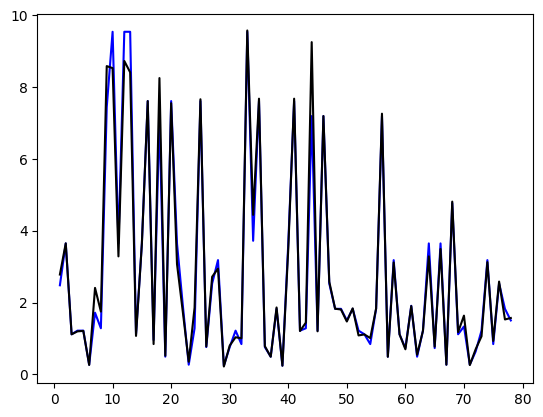

In [15]:
# Gradient Boosting Regressor - HSV (optimized)

# Set the parameters for the grid search
parameters = {
    'n_estimators': [350],
    'max_depth': [4],
    'learning_rate': [0.04],
    'loss': ['huber']
}

# Create the grid search object
grid_search = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5, verbose=1)

# Fit the grid search object to the training data
grid_search.fit(X_HSV_train, y1_HSV_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(best_params)

# Create model with the best parameters
model = GradientBoostingRegressor(**best_params)

# Train the model
model.fit(X_HSV_train, y1_HSV_train)

# Evaluate the model on the validation set
print('GBR_HSV - R^2            :', score_GBR_HSV)
score_GBR_HSV = model.score(X_HSV_test, y1_HSV_test)
print('GBR_HSV - R^2 (optimized):', score_GBR_HSV)

# Make predictions on the test set
y_pred_gbr_hsv = model.predict(X_HSV_test)

# Evaluate the model
print("GBR_HSV - MSE            :", mse_GBR_HSV)
mse_GBR_HSV = mean_squared_error(y1_HSV_test, y_pred_gbr_hsv)
print("GBR_HSV - MSE (optimized):", mse_GBR_HSV)

print("GBR_HSV - MAE            :", mae_GBR_HSV)
mae_GBR_HSV = mean_absolute_error(y1_HSV_test, y_pred_gbr_hsv)
print("GBR_HSV - MAE (optimized):", mae_GBR_HSV)

#plot
x_plt = createList(1, len(y1_HSV_test))

plt.plot(x_plt, y1_HSV_test, color ='b')
plt.plot(x_plt, y_pred_gbr_hsv, color ='k')
plt.show()

Epoch 67: early stopping
3/3 [==============================] - 0s 5ms/step - loss: 0.1600 - mae: 0.2951 - mse: 0.1600 - r_square: 0.9708


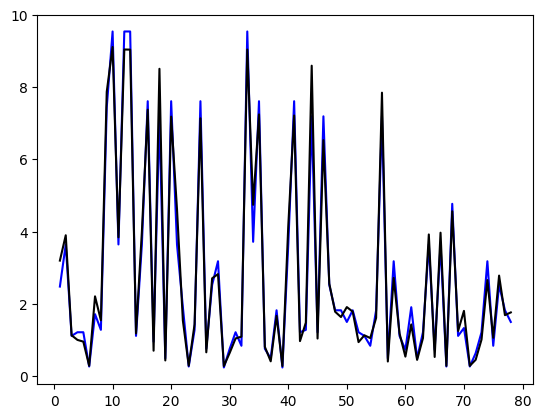

CNN_RGB - R^2: 0.9708231091499329
CNN_RGB - MSE: 0.29507237672805786
CNN_RGB - MAE: 0.16004891693592072


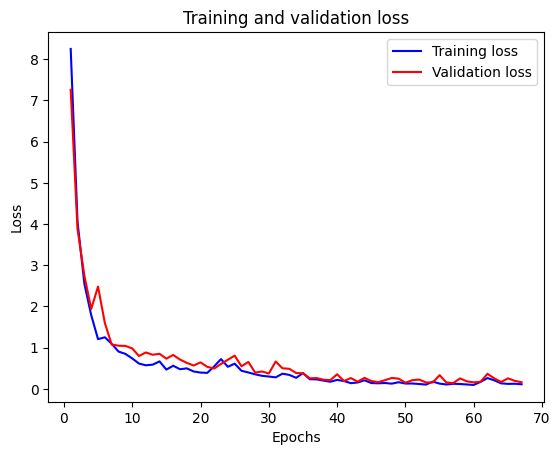

In [16]:
# Convolutionary Neural Network (CNN)

# Define model architecture

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(
    filters=64, 
    kernel_size=3, 
    padding='same', 
    activation='relu', 
    input_shape=(X_RGBimage_train.shape[1:])))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(rate=0))
model.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=3,
    padding='same',
    activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(rate=0))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

# Compile model
model.compile(
    loss='mean_squared_error', 
    optimizer='adam', 
    metrics=['mae', 'mse', r_square])

# Train model
es = EarlyStopping(
    monitor='val_loss', 
    mode='min', 
    verbose=1, 
    patience=10)

history = model.fit(
    X_RGBimage_train, 
    y1_RGBimage_train, 
    epochs=1000, 
    batch_size=32, validation_data=(X_RGBimage_test, y1_RGBimage_test), 
    callbacks=[es], 
    verbose=0
)

# Evaluate the model on the test data
score = model.evaluate(X_RGBimage_test, y1_RGBimage_test)
mse_CNN_RGB = score[1]
mae_CNN_RGB = score[2]
score_CNN_RGB = score[3]

# Obtain predicted result and compare with real answer
y_pred_cnn_rgb = model.predict(X_RGBimage_test)
plt.plot(x_plt, y1_RGBimage_test, color ='b')
plt.plot(x_plt, y_pred_cnn_rgb, color ='k')
plt.show()

# Print the results
print("CNN_RGB - R^2:", score_CNN_RGB)
print('CNN_RGB - MSE:', mse_CNN_RGB)
print('CNN_RGB - MAE:', mae_CNN_RGB)

# Get the training and validation loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
# Summary 

# Summary for RGB
print("\x1B[4m" + 'RGB' + "\x1B[0m")
print("\x1B[4m" + 'R-square, Mean-squared Error, Mean Absolute Error' + "\x1B[0m")
print('LR : "%.4f", "%.4f", "%.4f"' % (score_LR_RGB, mse_LR_RGB, mae_LR_RGB))
print('SVR: "%.4f", "%.4f", "%.4f"' % (score_SVR_RGB, mse_SVR_RGB, mae_SVR_RGB))
print('GBR: "%.4f", "%.4f", "%.4f"' % (score_GBR_RGB, mse_GBR_RGB, mae_GBR_RGB))
print('CNN: "%.4f", "%.4f", "%.4f"' % (score_CNN_RGB, mse_CNN_RGB, mae_CNN_RGB))

# Summary for HSV
print("\x1B[4m" + '\nHSV' + "\x1B[0m")
print("\x1B[4m" + 'R-square, Mean-squared Error, Mean Absolute Error' + "\x1B[0m")
print('LR : "%.4f", "%.4f", "%.4f"' % (score_LR_HSV, mse_LR_HSV, mae_LR_HSV))
print('SVR: "%.4f", "%.4f", "%.4f"' % (score_SVR_HSV, mse_SVR_HSV, mae_SVR_HSV))
print('GBR: "%.4f", "%.4f", "%.4f"' % (score_GBR_HSV, mse_GBR_HSV, mae_GBR_HSV))

RGB
R-square, Mean-squared Error, Mean Absolute Error
LR : "0.9327", "0.4855", "0.5118"
SVR: "0.9833", "0.1207", "0.2358"
GBR: "0.9769", "0.1664", "0.2016"
CNN: "0.9708", "0.2951", "0.1600"

HSV
R-square, Mean-squared Error, Mean Absolute Error
LR : "0.9439", "0.4052", "0.4705"
SVR: "0.9360", "0.4620", "0.4610"
GBR: "0.9778", "0.1598", "0.1968"


In [94]:
#extract data to excel file
df_csv = pd.DataFrame(
    {
        'y1_RGBimage_test': y1_RGBimage_test,
        'y1_RGB_test': y1_RGB_test,
        'y_pred_lr_rgb': y_pred_lr_rgb,
        'y_pred_svr_rgb': y_pred_svr_rgb,
        'y_pred_gbr_rgb': y_pred_gbr_rgb,
        'y_pred_cnn_rgb': y_pred_cnn_rgb.flatten(),
        'y1_HSVimage_test': y1_HSVimage_test,
        'y1_HSV_test': y1_HSV_test,
        'y_pred_lr_hsv': y_pred_lr_hsv,
        'y_pred_svr_hsv': y_pred_svr_hsv,
        'y_pred_gbr_hsv': y_pred_gbr_hsv,
        'y_pred_cnn_hsv': y_pred_cnn_hsv.flatten()
    }
)

df_csv.to_csv("predictions.csv", index=False)

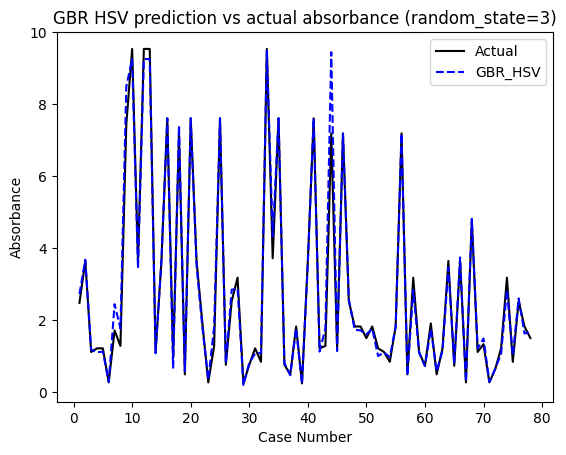

In [107]:
# Plot actual and predicted values for each model
plt.plot(x_plt, y1_RGBimage_test, 'k-', label='Actual')
plt.plot(x_plt, y_pred_gbr_hsv, 'b--', label='GBR_HSV')

# Add title and legend
plt.title('GBR HSV prediction vs actual absorbance (random_state=3)')
plt.legend()

# Add axis labels
plt.xlabel('Case Number')
plt.ylabel('Absorbance')

# Show the plot
plt.show()

In [18]:
df_csv = pd.DataFrame(
    {
        'True value': y1_RGBimage_test,
        'LR_RGB': y_pred_lr_rgb,
        'SVR_RGB': y_pred_svr_rgb,
        'GBR_RGB': y_pred_gbr_rgb,
        'CNN': y_pred_cnn_rgb.flatten(),
        'LR_HSV': y_pred_lr_hsv,
        'SVR_HSV': y_pred_svr_hsv,
        'GBR_HSV': y_pred_gbr_hsv,
    }
)

df_csv = df_csv.sort_values(
    by='True value',
    ascending=True)
df_csv

,True value,LR_RGB,SVR_RGB,GBR_RGB,CNN,LR_HSV,SVR_HSV,GBR_HSV
38,0.2401,0.044777,0.322942,0.245318,0.279358,-0.117107,0.413519,0.238685
28,0.2401,0.062483,0.324219,0.248377,0.278392,-0.102728,0.420030,0.217527
22,0.2674,0.155701,0.417822,0.259290,0.290450,0.168434,0.472575,0.349761
5,0.2674,-0.094897,0.387464,0.264600,0.289178,-0.032486,0.382422,0.260138
66,0.2674,0.241396,0.421653,0.223135,0.285986,0.231881,0.508929,0.267060
...,...,...,...,...,...,...,...,...
19,7.6124,8.264883,7.504261,7.614888,7.185696,8.207619,7.590291,7.553454
11,9.5432,8.167317,9.581356,9.538734,9.044236,8.242101,7.889615,8.729647
32,9.5432,8.088525,9.527221,9.538734,9.042771,8.163168,7.954424,9.579478
9,9.5432,7.907668,9.473083,9.538734,9.113179,7.988165,8.077496,8.531035


In [19]:
plt.plot(x_plt, df_csv[['True value']], 'b', label='True Value')
plt.plot(x_plt, df_csv[['LR_RGB']], 'g', label = 'LR_RGB')
plt.title('Prediction of LR_RGB')
plt.xlabel('Data count')
plt.ylabel('Absorbance (A)')
plt.legend()
plt.savefig('plt1.png', bbox_inches='tight')
plt.close()

plt.plot(x_plt, df_csv[['True value']], 'b', label='True Value')
plt.plot(x_plt, df_csv[['LR_HSV']], 'g', label = 'LR_HSV')
plt.title('Prediction of LR_HSV')
plt.xlabel('Data count')
plt.ylabel('Absorbance (A)')
plt.legend()
plt.savefig('plt2.png', bbox_inches='tight')
plt.close()

plt.plot(x_plt, df_csv[['True value']], 'b', label='True Value')
plt.plot(x_plt, df_csv[['SVR_RGB']], 'g', label = 'SVR_RGB')
plt.title('Prediction of SVR_RGB')
plt.xlabel('Data count')
plt.ylabel('Absorbance (A)')
plt.legend()
plt.savefig('plt3.png', bbox_inches='tight')
plt.close()

plt.plot(x_plt, df_csv[['True value']], 'b', label='True Value')
plt.plot(x_plt, df_csv[['SVR_HSV']], 'g', label = 'SVR_HSV')
plt.title('Prediction of SVR_HSV')
plt.xlabel('Data count')
plt.ylabel('Absorbance (A)')
plt.legend()
plt.savefig('plt4.png', bbox_inches='tight')
plt.close()

plt.plot(x_plt, df_csv[['True value']], 'b', label='True Value')
plt.plot(x_plt, df_csv[['GBR_RGB']], 'g', label = 'GBR_RGB')
plt.title('Prediction of GBR_RGB')
plt.xlabel('Data count')
plt.ylabel('Absorbance (A)')
plt.legend()
plt.savefig('plt5.png', bbox_inches='tight')
plt.close()

plt.plot(x_plt, df_csv[['True value']], 'b', label='True Value')
plt.plot(x_plt, df_csv[['GBR_HSV']], 'g', label = 'GBR_HSV')
plt.title('Prediction of GBR_HSV')
plt.xlabel('Data count')
plt.ylabel('Absorbance (A)')
plt.legend()
plt.savefig('plt6.png', bbox_inches='tight')
plt.close()

plt.plot(x_plt, df_csv[['True value']], 'b', label='True Value')
plt.plot(x_plt, df_csv[['CNN']], 'g', label = 'CNN')
plt.title('Prediction of CNN')
plt.xlabel('Data count')
plt.ylabel('Absorbance (A)')
plt.legend()
plt.savefig('plt7.png', bbox_inches='tight')
plt.close()
